<a href="https://colab.research.google.com/github/CarlosOliv71/Pos-Graduacao-de-Ciencia-de-Dados-da-Unicarioca/blob/main/Grupo_4_Atividade_2_Espanha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Descrição dos dados sobre suicídio

O dataset que vamos trabalhar [está hospedado nesta página](https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016), e traz informações sobre vários países. Este *dataset* contempla o período entre os anos de 1985 e 2016.


In [ ]:
# importar pacotes necessários
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar os dados sobre suicídio para um DataFrame
df = pd.read_csv("master.csv")

### Dicionário de Variáveis

Esse arquivo *csv* possui 12 colunas. São elas:

* **country:** país onde os dados foram registrados
  * 101 países
* **year:** ano em que os dados foram registrados
  * 1987 a 2016
* **sex:** sexo considerado no registro
  * *male* - masculino
  * *female* - feminino
* **age**: faixa etária considerada
  * 5-14 anos
  * 15-24 anos
  * 25-34 anos
  * 35-54 anos
  * 55-74 anos
  * 75+ anos
* **suicides_no:** número de suicídios
* **population:** população para o grupo
* **suicides/100k pop:** número de suicídios por 100 mil habitantes
* **country_year:** identificador contendo `country` + `year`
* **HDI for year:** Índice de Desenvolvimento Humano (IDH) para o ano
* **gdp_for_year:** Produto Interno Bruto (PIB) para o ano
* **gdp_per_capita:** Produto Interno Bruto (PIB) per capita

## Análise Exploratória dos Dados

Este arquivo recebeu um tratamento anterior que facilitará muito a nossa análise.

O conjunto de dados contém 27.820 linhas e 12 colunas. Como você pode ver abaixo, os dados podem ser agrupados por vários critérios como país, ano, sexo e idade.

In [ ]:
# ver o formato do DataFrame
print("Formato do DataFrame: ", df.shape)

# ver as 5 primeiras entradas dos dataset
df.head()

Formato do DataFrame:  (27820, 12)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


A primeira coisa que vamos fazer é criar um *DataFrame* contendo apenas as informações relacionadas a Espanha.

Isso irá facilitar muito nossa manipulação da estrutura, além de ser uma boa prática em projetos de *Data Science*.


In [ ]:
# extrair apenas os dados relativos a Espanha
df_espanha = df[df.country == "Spain"].copy()

# ver o formato do novo DataFrame
print("Formato do DataFrame: ", df_espanha.shape)

# exibir as 5 primeiras entradas do novo DataFrame
df_espanha.head()

Formato do DataFrame:  (372, 12)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
23528,Spain,1985,male,75+ years,305,691500,44.11,Spain1985,0.725,"180,302,412,231",5009,G.I. Generation
23529,Spain,1985,male,55-74 years,624,3115900,20.03,Spain1985,0.725,"180,302,412,231",5009,G.I. Generation
23530,Spain,1985,female,75+ years,131,1174800,11.15,Spain1985,0.725,"180,302,412,231",5009,G.I. Generation
23531,Spain,1985,male,35-54 years,497,4471200,11.12,Spain1985,0.725,"180,302,412,231",5009,Silent
23532,Spain,1985,male,25-34 years,219,2712700,8.07,Spain1985,0.725,"180,302,412,231",5009,Boomers


Para ter uma noção da integridade dos dados, vamos verificar isoladamente os *DataFrames* da Espanha e o Mundial. Principalmente quando se quer comparar duas coisas, é importante que eles sejam similares e estatisticamente representativas.

Como mostramos abaixo, a porcentagem de valores ausentes referentes ao HDI torna inviável o uso dessa variável. Caso se desejasse realmente usar, seria necessária uma etapa de coleta de dados a partir de outras fontes.

In [ ]:
# valores ausentes nos dados mundiais
print("--> Mundial:")
display(df.isnull().sum())

print("\n", "--." * 10, "\n")

# velores ausentes nos dados da Espanha
print("--> Espanha:")
display(df_espanha.isnull().sum())

--> Mundial:


,0
country,0
year,0
sex,0
age,0
suicides_no,0
population,0
suicides/100k pop,0
country-year,0
HDI for year,19456
gdp_for_year ($),0



 --.--.--.--.--.--.--.--.--.--. 

--> Espanha:


,0
country,0
year,0
sex,0
age,0
suicides_no,0
population,0
suicides/100k pop,0
country-year,0
HDI for year,252
gdp_for_year ($),0


### Tendência da taxa de suicídio na Espanha



Uma primeira comparação que vamos fazer diz respeito ao número de suicídios cometidos na Espanha por 100 mil habitantes, e a tendência do gráfico em relação à taxa mundial.

Para ver a tendência, é melhor sempre usar essa relação por 100 mil, pois a população do país cresceu muito de 1985 para 2015. Se formos comparar em termos absolutos, poderemos tirar conclusões erradas ou distorcidas.

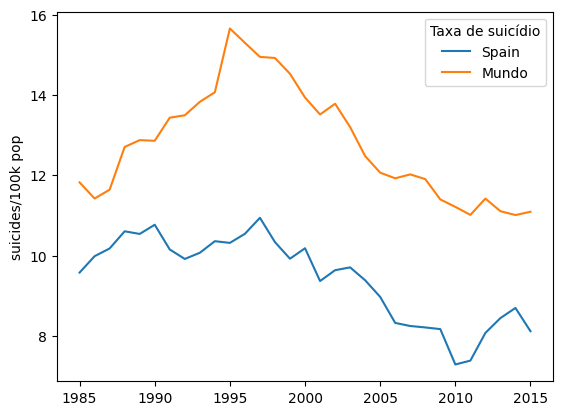

In [ ]:
# pegar a media mundial e da Espanha em suicidios
years = df_espanha.year.unique()    # pegar os anos para o eixo x
suicides_espanha_mean = df_espanha.groupby('year')['suicides/100k pop'].mean()
suicides_world_mean = df.groupby('year')['suicides/100k pop'].mean()

# como o Brasil nao tem 2016, vamos eliminar do dataframe mundial essa entrada
suicides_world_mean.drop(2016, inplace=True)

# plotar lineplot comparativo entre Brasil e Mundo
ax = sns.lineplot(x=years, y=suicides_espanha_mean, label='Spain')
ax = sns.lineplot(x=years, y=suicides_world_mean, label='Mundo')
plt.legend(title="Taxa de suicídio")
plt.show()

Uma coisa que é facilmente percebida no gráfico acima é que apesar da taxa de suicídios na Espanha ser menor que a média mundial, ela vem crescendo constantemente ao longo de 30 anos.

A linha laranja teve um pico por volta de 1995, porém reverteu o *slope* e vem caindo ano após ano. Já a linha azul (Espanha) tem um *slope* positivo praticamente ao longo de todo o período analisado.

### Faixa etária com maior índice de suícidio

Vamos criar uma tabela dinâmica (*pivot table*) para analisar as 6 faixas etárias em função do ano e do número de suicídios por 100 mil habitantes.

Nosso principal objetivo aqui é identificar qual a faixa etária que tem a maior representatividade entre aqueles que tiram a própria vida, e identificar se houve alguma mudança no perfil ao longo de 30 anos.

In [ ]:
# criar uma tabela dinâmica
table = pd.pivot_table(df_espanha, values='suicides_no', index=['year'], columns=['age'])

# reordenar as tabelas para deixar em ordem crescente
column_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
table = table.reindex(column_order, axis=1)

# ver as 5 primeiras entradas da pivot table
table.head()

age,5-14 years,15-24 years,25-34 years,35-54 years,55-74 years,75+ years
year,,,,,,
1985,4.5,109.5,139.0,335.5,450.5,218.0
1986,14.5,140.5,170.0,347.5,489.0,216.0
1987,9.5,142.0,183.5,329.5,506.5,231.0
1988,11.0,171.5,191.0,364.0,487.5,255.0
1989,12.0,172.0,196.5,355.5,502.0,255.5


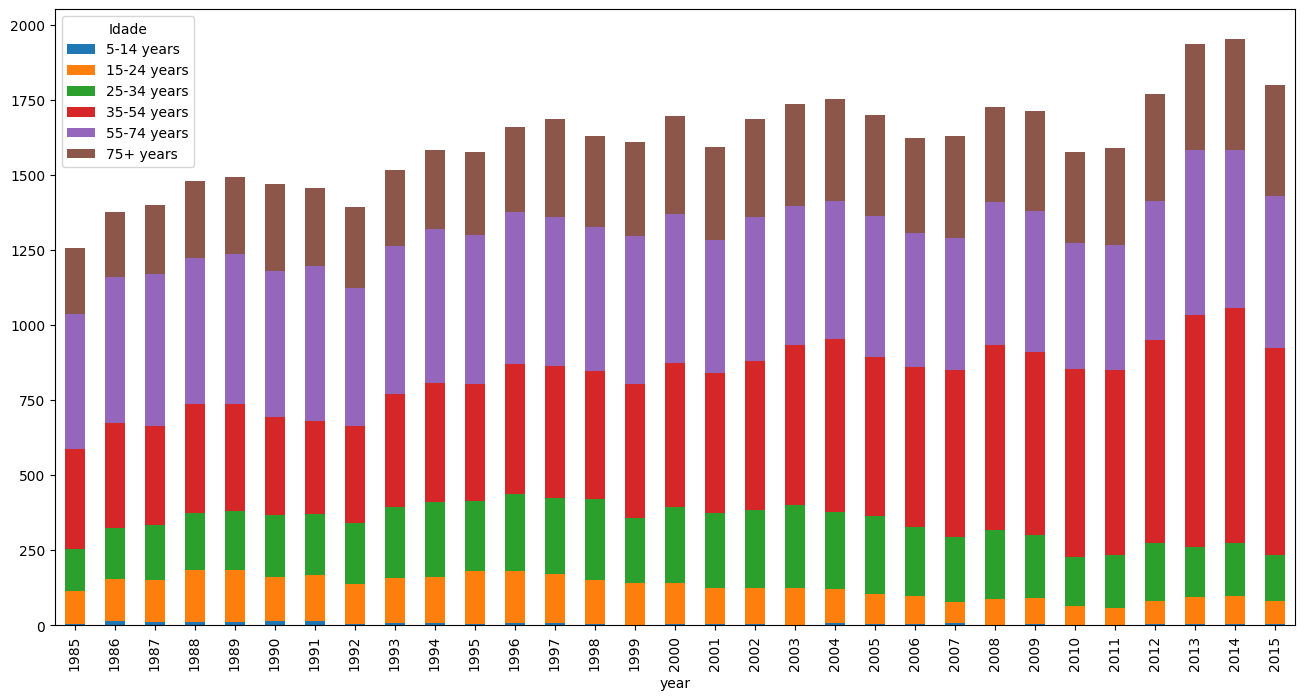

In [ ]:
# plotar a pivot table das faixas etárias
table.plot.bar(stacked=True, figsize=(16,8))
plt.legend(title="Idade");

Mesmo visualmente é fácil identificar que o grupo de pessoas que mais cometem suicídio está entre 35-54 anos. Em segundo lugar, estão pessoas entre 25-34 anos de idade.

Juntos, esses dois grupos correspondem a quase 60% dos registros do banco de dados.

In [ ]:
# estatística de suicídios por faixa etária
table[['25-34 years']].loc[2015]
table.loc[2015] / table.loc[2015].sum()

,2015
age,
5-14 years,0.002220
15-24 years,0.043285
25-34 years,0.085183
35-54 years,0.381521
55-74 years,0.282186
75+ years,0.205605


Um outro ponto que vale a pena ressaltar é o aumento de casos entre pessoas acima de 55 anos. Em 1985, as pessoas com mais idade representavam uma pequena fatia do número total.

Entretanto, em 2013/2014 é nítido que mesmo para pessoas acima de 75 anos houve um incremento significativo no número de suicídios.

Para se inferir a causa dessa mudança de padrão, é necessário se avaliar mais profundamente questões que vão além dos números (como exemplo, fatores qualitativos, momento econômico do país e a cultura dominante de cada época).

### Taxa de suicídio entre homens e mulheres


Uma outra análise de grande importância é ver a porcentagem dos suicídios entre homens e mulheres.

Analisando-se todo o período, o *dataset* utilizado mostrou que aproximadamente 75% dos casos foram cometidos por homens e 24% deles por mulheres. Optou-se por pegar a média dos 30 anos, pois não houve mudança significativa desse comportamento durante o período.

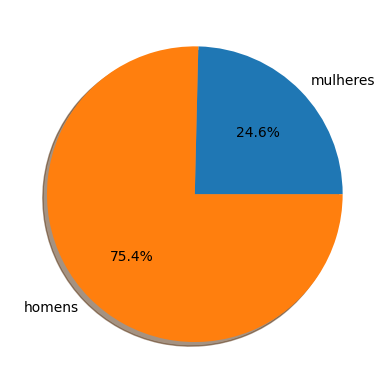

In [ ]:
# extrair valores entre homens e mulheres
homens_mulheres = df_espanha.groupby('sex').suicides_no.sum() / df_espanha.groupby('sex').suicides_no.sum().sum()

# plotar o gráfico de pizza
plt.pie(homens_mulheres, labels=['mulheres', 'homens'], autopct='%2.1f%%', shadow=True);

### Correlações entre o PIB, IDH e número de suicídios

Criando uma matriz de correlação e plotando um *heatmap*, infere-se que o aumento no PIB per capita não diminuiu o número de suicídios por 100 mil habitantes. Na verdade, ele se manteve estável, contrariando o senso comum da maioria das pessoas.

Em relação ao IDH, como foi mencionado anteriormente, há muitos valores ausentes nas células, o que pode dar uma interpretação incorreta ou com viés.


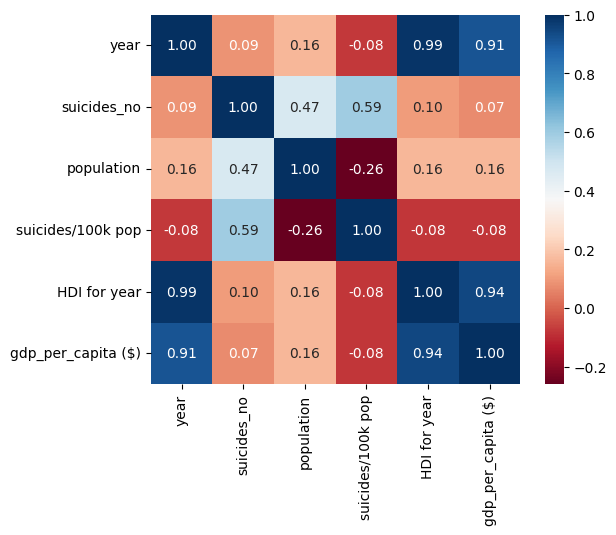

In [ ]:
# plotar heatmap
# Seleciona somente as colunas numéricas para o cálculo da correlação
numeric_df = df_espanha.select_dtypes(include=['number'])

# Calcula a correlação somente das colunas numéricas
corr = numeric_df.corr()
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

## Data Science na prevenção do suicídio

A proposta deste trabalho é conscientizar a comunidade sobre a real importância de um problema tão latente nos dias atuais, porém negligenciado ou ignorado por boa parte das pessoas.

O conjunto de dados usado aqui é simplificado, porém ideal para uma abordagem inicial, para se criar uma consciência situacional a respeito do tema.

Há diversas iniciativas dentro do campo da Inteligência Artificial visando não apenas a conscientização, mas também prevenção de suicídios. [Uma das mais populares diz respeito à análise de postagens em redes sociais](https://qz.com/1367197/machines-know-when-someones-about-to-attempt-suicide-how-should-we-use-that-information), onde algoritmos de *Machine Learning* são capazes de identificar potenciais suicidas e alertar outras pessoas.

> **A campanha é em setembro, mas falar sobre prevenção do suicídio em todos os meses do ano é fundamental** *-Setembro Amarelo*

Ainda são iniciativas muito incipientes, que esbarram em muitas questões de privacidade, porém empresas como a Meta já tem apostado nesse caminho.